<h1>Metrics</h1>

<h2>Classification</h2>

<h3>Accuracy, Precission, Recall, F1-Score, Specificity, Sensitivity, ROC, AUC </h3>

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
df = load_breast_cancer()

In [3]:
X = pd.DataFrame(df['data'], columns=df['feature_names'])

In [4]:
Y = pd.DataFrame(df['target'], columns = ["Target"])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [6]:
nb_classifier = GaussianNB()

In [7]:
nb_classifier.fit(X_train, y_train)

C:\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [8]:
y_pred = nb_classifier.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [14]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9736842105263158
Precision: 0.9594594594594594
Recall: 1.0
F1 Score: 0.9793103448275862
ROC AUC Score: 0.9651162790697674


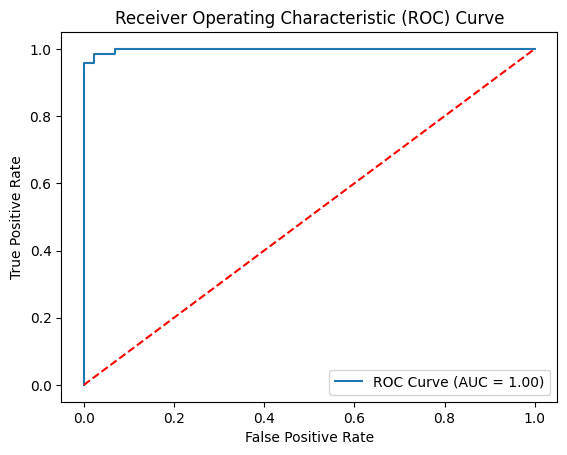

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = nb_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

auc = roc_auc_score(y_test, y_scores)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'r--')  # Plotting the diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<h2>Regression</h2>

<h3>MSE, MAE</h3>

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
data = fetch_california_housing()

In [24]:
dataset = pd.DataFrame(data.data)
dataset.columns = data.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
dataset['Price'] = data.target

In [26]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
intercept = model.intercept_
slope = model.coef_

In [32]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

mae = mean_absolute_error(y_test, predictions)

In [33]:
print("Intercept:", intercept)
print("Slope:", slope)
print("MSE:", mse)
print("MAE:", mae)

Intercept: -37.023277706064064
Slope: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
MSE: 0.555891598695244
MAE: 0.5332001304956558
